<a href="https://colab.research.google.com/github/santiago1595/Climate_change_model/blob/main/VerdeVenture(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

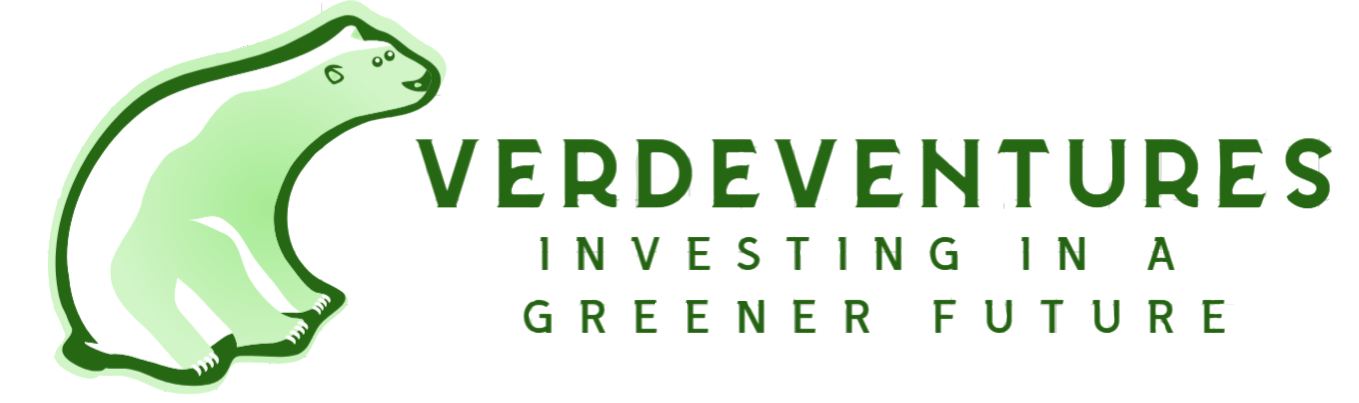

# **Welcome to VerdeVentures!**
***Investing in a Greener Future.***

Climate change is a pressing issue, and the best way to help the planet and make money is to support sustainable businesses and organizations.

The main purpose of this project is to create a universe of stocks from the sp500 that are net zero carbon or are pledged to be net zero in the near future.

We use the [Net Zero Tracker](https://zerotracker.net/) of all the current Global companies and countries that are zero or pledge zero carbon footprint.

With technology we were able to tailor and curate the best stocks that are eco friendly and put out a very decent performance.



In [46]:
pip install yahooquery pandas_ta

**Here we will load the entire list of curate eco-friendly companies and get all the necessary libraries to work.**

In [47]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from pandas.io.excel import read_excel
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
from yahooquery import search
import datetime

from google.colab import files
list_sp = files.upload()
file_name1 = next(iter(list_sp))
df_green = pd.read_excel(file_name1)
df_green = df_green['name']

plt.style.use('fivethirtyeight')

Saving Zero Pledge.xlsx to Zero Pledge (1).xlsx


In [48]:
"""df_green = pd.DataFrame(df_green_1)
df_green.replace('', None, inplace=True)
df_green = df_green.dropna(axis=1, how='all')
"""
print(df_green)

0                     Netflix
1                     Twitter
2                        Visa
3          Berry Global Group
4      General Motors Company
                ...          
572           Cabot Oil & Gas
573         Bath & Body Works
574        Diamondback Energy
575                     Heico
576                W.P. Carey
Name: name, Length: 577, dtype: object


**After submitting the file, we will promptly and seamlessly fetch stock data for the specified companies via the yFinance API.**

In [50]:
yf.pdr_override()
def stock_universe(tickers, start_date, end_date):
  """
  This function searchs and get the information from the yahoo finance for the
  adj price

  Args:
    tickers = List data type of list of all of the stocks tickers
    start_date = String formart and YYYY-MM-DD
    end_date = String formart and YYYY-MM-DD

  returns:
    data = returns DataFrame of all the stocks and the adj price
  """

  start_date = datetime.datetime.strptime(start_date, "%Y-%m-%d")
  end_date = datetime.datetime.strptime(end_date, "%Y-%m-%d")

  data = pdr.get_data_yahoo(tickers, start=start_date, end=end_date, period="1d")

  # Use the 'Adj Close' column to get the closing prices
  data = data['Close']

  return data

def get_ticker(df):
    """
    This function takes a dataframe with the list of company names and returns a dataframe with the corresponding tickers.

    Args:
        df (DataFrame): A dataframe containing company names.

    Returns:
        df_tickers (DataFrame): A dataframe with tickers.
    """
    # Create a new dataframe with uppercase company names
    df_upper_case = pd.DataFrame(df)
    df_upper_case['comps'] = df.str.upper()

    # Create columns for info and tickers
    df_upper_case['info'] = ''
    df_upper_case['tickers'] = ''

    # Search for tickers by name
    for i, row in df_upper_case.iterrows():
        search_results = search(row['comps'])
        if 'quotes' in search_results:
            quotes = search_results['quotes']
            if quotes:
                df_upper_case.at[i, 'info'] = quotes[0]
                df_upper_case.at[i, 'tickers'] = quotes[0]['symbol']

    return df_upper_case

# Lets get the ticker information since the data is provided only with
# the name of the stock and the functiona nd yfinance only takes tickers
df_green['ticker'] = get_ticker(df_green)
print(df_green['ticker']['tickers'])

# Here we gather quite a lot of information and we filter it for better use
df_g = df_green['ticker']['tickers']
# convert the Df to a list for creating the universe
ticker_symbols = df_g.tolist()
start_date = "2018-01-01"
end_date = "2023-09-10"
stock_data = stock_universe(ticker_symbols, start_date, end_date)

0         NFLX
1      EBT-USD
2            V
3         BERY
4           GM
        ...   
572     0HRZ.L
573       BBWI
574       FANG
575        HEI
576      WPY.F
Name: tickers, Length: 577, dtype: object


ERROR:yfinance:Could not get exchangeTimezoneName for ticker '' reason: list index out of range


[*********************100%%**********************]  555 of 555 completed

ERROR:yfinance:
4 Failed downloads:
ERROR:yfinance:['']: %ticker%E%ticker%x%ticker%c%ticker%e%ticker%p%ticker%t%ticker%i%ticker%o%ticker%n%ticker%(%ticker%'%ticker%:%ticker% %ticker%N%ticker%o%ticker% %ticker%t%ticker%i%ticker%m%ticker%e%ticker%z%ticker%o%ticker%n%ticker%e%ticker% %ticker%f%ticker%o%ticker%u%ticker%n%ticker%d%ticker%,%ticker% %ticker%s%ticker%y%ticker%m%ticker%b%ticker%o%ticker%l%ticker% %ticker%m%ticker%a%ticker%y%ticker% %ticker%b%ticker%e%ticker% %ticker%d%ticker%e%ticker%l%ticker%i%ticker%s%ticker%t%ticker%e%ticker%d%ticker%'%ticker%)%ticker%
ERROR:yfinance:['KVYO', 'US92556H1077.SG', '^RTX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-01-01 00:00:00 -> 2023-09-10 00:00:00)')


In [51]:
# Check the data columns
stock_data = stock_data.loc[:, stock_data.min() >= 5.0]
print(stock_data.columns)


Index(['0HG8.L', '0HRZ.L', '0J7Q.L', '0L7F.L', '0QYJ.IL', 'A', 'AAL', 'AAP',
       'AAPL', 'ABBV',
       ...
       'XRX', 'XYL', 'YUM', 'Z0Y.SG', 'ZBH', 'ZBRA', 'ZION', 'ZM', 'ZTS',
       '^IXIC'],
      dtype='object', length=521)


In [52]:
# create a new and more clean DF, drop all the columns that are not stocks
clean_g = stock_data[stock_data.columns[~stock_data.columns.str.contains('[\.\^]')]]
print(clean_g.columns)

Index(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABT', 'ACM', 'ADBE', 'ADI', 'ADM',
       ...
       'XOM', 'XPO', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION', 'ZM', 'ZTS'],
      dtype='object', length=506)


In [53]:
# Drop all the empty columns
clean_g = clean_g.dropna(axis=1, how='all')
clean_g = clean_g.reset_index(drop=True)
print(clean_g.columns)

Index(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABT', 'ACM', 'ADBE', 'ADI', 'ADM',
       ...
       'XOM', 'XPO', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION', 'ZM', 'ZTS'],
      dtype='object', length=506)


In [54]:
# Calculte the annual mean returns and variances
daily_returns = clean_g.pct_change()
annual_mean_returns = daily_returns.mean() * 252
annual_return_variance = daily_returns.var() * 252


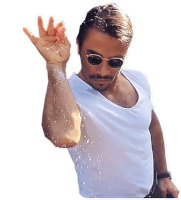

# **Here is where the magic happens...**
Here we will use a well known mathematical approach of picking stocks based on the returns and the variance of every stock on our eco-friendly universe.

Variance is the way for us to find out how risky is one stock compare to the returns.
We will like to prioritize allocations to the stocks which have lower risk and higher returns.

(The square root of variance is the standard deviation; which is the volatility)

In [55]:
# Create a new dataframe with the cleaned data
df = pd.DataFrame(clean_g.columns, columns=['ticker'])
#print(df)
# lets calculate the variables to choose our stock universe

df['Variances'] = annual_return_variance.values
df['Returns'] = annual_mean_returns.values
df = df[df['ticker'] != 'VFS']
df = df[df['ticker'] != 'SIVBQ']
print(df)

    ticker  Variances   Returns
0        A   0.074464  0.118816
1      AAL   0.311340 -0.055826
2      AAP   0.121988 -0.012635
3     AAPL   0.092444  0.267767
4     ABBV   0.068615  0.099405
..     ...        ...       ...
501    ZBH   0.082708  0.041403
502   ZBRA   0.150980  0.216814
503   ZION   0.167536  0.025986
504     ZM   0.348631  0.200471
505    ZTS   0.068276  0.182573

[505 rows x 3 columns]


please ignore this since this is a trial to try to use technical indicators on the probability of prediction of risk and reward, need more testing and at this point is not well fitted on a unsupervised machine learning model

In [ ]:
# import pandas_ta as ta
'''
from scipy.stats import linregress
import pandas_ta as ta

def get_slope(array):
    y = np.array(array)
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    return slope


backrolling_n= 12

#df['ATR'] = clean_g.ta.atr(length = 15)
df['MA200'] = clean_g.ta.ema(length=200)
df['slopeMA200'] = df['MA200'].rolling(window=backrolling_n).apply(get_slope, raw=True)
df['RSI'] = clean_g.ta.rsi(length = 13)
df['slopeATR'] = df['ATR'].rolling(window=backrolling_n).apply(get_slope, raw=True)
'''


"\nfrom scipy.stats import linregress\nimport pandas_ta as ta\n\ndef get_slope(array):\n    y = np.array(array)\n    x = np.arange(len(y))\n    slope, intercept, r_value, p_value, std_err = linregress(x,y)\n    return slope\n\n\nbackrolling_n= 12\n\n#df['ATR'] = clean_g.ta.atr(length = 15)\ndf['MA200'] = clean_g.ta.ema(length=200)\ndf['slopeMA200'] = df['MA200'].rolling(window=backrolling_n).apply(get_slope, raw=True)\ndf['RSI'] = clean_g.ta.rsi(length = 13)\ndf['slopeATR'] = df['ATR'].rolling(window=backrolling_n).apply(get_slope, raw=True)\n"

In [56]:
# Lets make ultra sure that we have clean data
nan_count = df.isna().sum().sum()
print(nan_count)
df = df.dropna()
nan_count = df.isna().sum().sum()
print(nan_count)

0
0


# **Here we will utilize the Clustering method of machine learning to select the best clusters of perfoming stocks against their risk and returns**

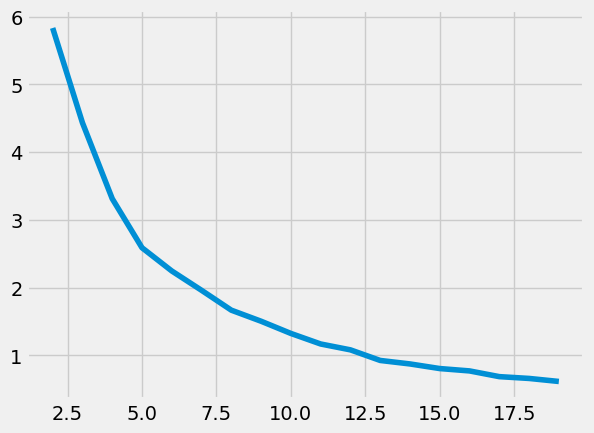

In [57]:
# Use elbow method to determine the number of clusters to model the stock data
X = df[['Returns','Variances']].values
inertia_list = []
for k in range (2, 20):
  kmeans = KMeans(n_clusters=k, n_init=2)
  kmeans.fit(X)
  inertia_list.append(kmeans.inertia_)

plt.plot(range(2,20), inertia_list)
plt.show()

In [58]:
# Get the labels and the groups
kmeans = KMeans(n_clusters=13,n_init=2).fit(X)
labels = kmeans.labels_
df['clusters'] = labels

Lets view the clusters of stocks

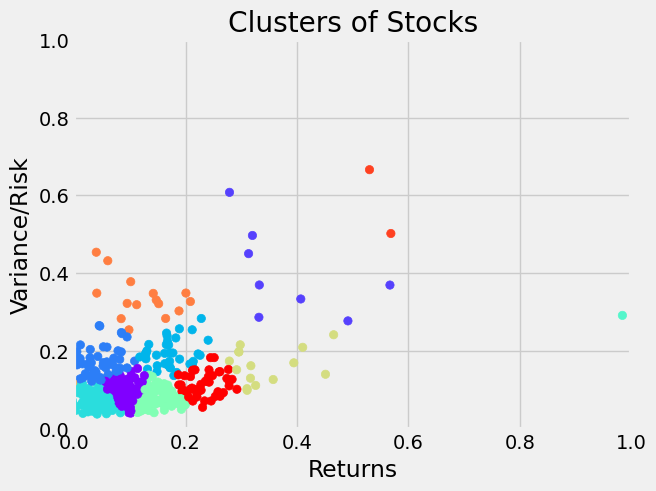

In [59]:
# Plot the Scaretter clusters
plt.scatter(X[:,0], X[:,1], c=labels,cmap = 'rainbow')
plt.title('Clusters of Stocks')
plt.xlabel('Returns')
plt.ylabel('Variance/Risk')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

# **AAAND here we got our portfolio...**

In [60]:
# create the function to create a simple diversified portafolio
def div_port(df):
    # Group the DataFrame by the 'clusters' column and select the first row for each group
    result_df = df.groupby('clusters').head(3)[['ticker', 'clusters']]
    return result_df['ticker']
portfolio = div_port(df)

print(portfolio)

0         A
1       AAL
2       AAP
3      AAPL
4      ABBV
5       ABT
6       ACM
7      ADBE
11     ADSK
12      AEE
13      AEL
14      AEP
16      AFG
18     AGNC
19      AIG
20      AIZ
21      AJG
23       AL
24     ALGN
25      ALK
26      ALL
27     ALLY
30      AMD
37     ANET
56      BAX
57     BBWI
85      CAR
86     CARR
91      CCL
92     CDNS
129     CZR
142    DISH
154     DXC
305    MRNA
339    OKTA
483    WFRD
Name: ticker, dtype: object


# **Now that we have a portfolio, lets decide how much of each stock we will invest**

In [61]:
def stock_universe_adj(tickers, start_date, end_date):
  """
  This function searchs and get the information from the yahoo finance for the
  adj price

  Args:
    tickers = List data type of list of all of the stocks tickers
    start_date = String formart and YYYY-MM-DD
    end_date = String formart and YYYY-MM-DD

  returns:
    data = returns DataFrame of all the stocks and the adj price
  """

  start_date = datetime.datetime.strptime(start_date, "%Y-%m-%d")
  end_date = datetime.datetime.strptime(end_date, "%Y-%m-%d")

  data = pdr.get_data_yahoo(tickers, start=start_date, end=end_date, period="1d")

  # Use the 'Adj Close' column to get the closing prices
  data = data['Adj Close']

  return data
assets = portfolio.tolist()
#print(assets)
weights = 1/len(assets)
n = len(assets)
result_array = np.repeat(weights,n)
#print(result_array)
opt_portfolio = pd.DataFrame()


opt_portfolio = stock_universe_adj(assets,start_date, end_date)

[*********************100%%**********************]  36 of 36 completed


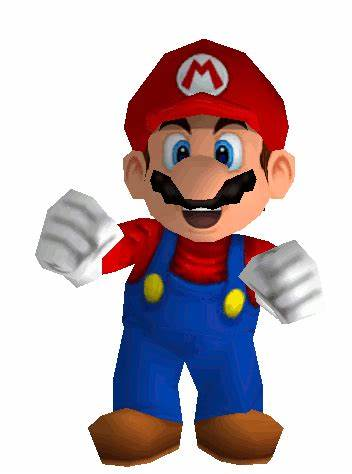

# **Like Mario, lets check this spagetti of stocks graphs and try to spot for outliers **

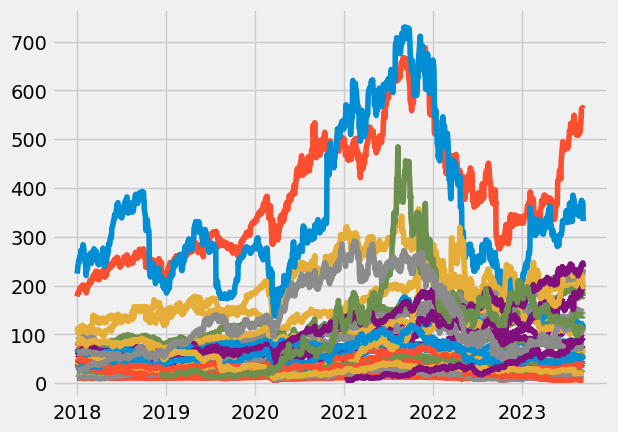

In [62]:
#print(opt_portfolio)
tmp = opt_portfolio
#tmp = np.cumsum(tmp)
plt.plot(tmp)
plt.show()

In [63]:
#lets get the simple daily return
returns = tmp.pct_change()

# Lets get the coveriance
cov_matrix_anual = returns.cov() *252
print(cov_matrix_anual) #< the sqrt of this coveriance between prices is the volatility

             A       AAL       AAP      AAPL      ABBV       ABT       ACM  \
A     0.084229  0.053633  0.037240  0.051598  0.031313  0.047292  0.047282   
AAL   0.053633  0.351870  0.065970  0.061146  0.027037  0.035303  0.088830   
AAP   0.037240  0.065970  0.137828  0.039722  0.028023  0.029464  0.047022   
AAPL  0.051598  0.061146  0.039722  0.104370  0.029684  0.045086  0.045974   
ABBV  0.031313  0.027037  0.028023  0.029684  0.077233  0.033099  0.032704   
ABT   0.047292  0.035303  0.029464  0.045086  0.033099  0.068102  0.032867   
ACM   0.047282  0.088830  0.047022  0.045974  0.032704  0.032867  0.108774   
ADBE  0.061908  0.055014  0.043148  0.080310  0.032595  0.050578  0.050306   
ADSK  0.068951  0.082485  0.048651  0.078416  0.034977  0.050662  0.065210   
AEE   0.027183  0.018503  0.028862  0.028767  0.019947  0.030142  0.028026   
AEL   0.054851  0.149171  0.073740  0.064116  0.039811  0.047017  0.098855   
AEP   0.022926  0.019082  0.024251  0.023585  0.016668  0.025695

In [64]:
port_variance = np.dot(result_array.T,np.dot(cov_matrix_anual,result_array))
print(port_variance)
port_vol = np.sqrt(port_variance)
print(port_vol)


0.07197609878981553
0.2682836163276012


In [65]:
# Lets calculate Yearly return
port_simple_annual_return = np.sum(returns.mean() * result_array) * 252
print(f"portfolio Anual Return is {port_simple_annual_return}")
per_var = str(round(port_variance, 2)*100)
per_volatility = str(round(port_vol,2)*100)
per_returns = str(round(port_simple_annual_return,2)*100)

print(f"Expected annual return {per_returns}")
print(f"Expected risk {per_volatility}")
print(f"Annual variance {per_var}")


portfolio Anual Return is 0.21790492614385257
Expected annual return 22.0
Expected risk 27.0
Annual variance 7.000000000000001


In [66]:
pip install PyPortfolioOpt

In [71]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import objective_functions

# Portfolio optimization

mu = expected_returns.mean_historical_return(tmp)
S = risk_models.sample_cov(tmp)

# Optimize for maximum Sharpe ratio
ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.L2_reg, gamma=1)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()

print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('A', 0.0), ('AAL', 0.0), ('AAP', 0.0), ('AAPL', 0.04833), ('ABBV', 0.01826), ('ABT', 0.0048), ('ACM', 0.0), ('ADBE', 0.01757), ('ADSK', 0.0), ('AEE', 0.00796), ('AEL', 0.0), ('AEP', 0.0), ('AFG', 0.0), ('AGNC', 0.0), ('AIG', 0.0), ('AIZ', 0.0), ('AJG', 0.05565), ('AL', 0.0), ('ALGN', 0.0), ('ALK', 0.0), ('ALL', 0.0), ('ALLY', 0.0), ('AMD', 0.07805), ('ANET', 0.0173), ('BAX', 0.0), ('BBWI', 0.0), ('CAR', 0.01833), ('CARR', 0.14125), ('CCL', 0.0), ('CDNS', 0.06219), ('CZR', 0.0), ('DISH', 0.0), ('DXC', 0.0), ('MRNA', 0.07526), ('OKTA', 0.00695), ('WFRD', 0.44809)])
Expected annual return: 105.6%
Annual volatility: 33.5%
Sharpe Ratio: 3.09


/usr/local/lib/python3.10/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


(1.0555998325153968, 0.33533868226137686, 3.0882206178296108)

In [72]:
from numpy.ma.core import remainder
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(tmp)
#print(latest_prices)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value= 10000)
#problem.solve(solver=cvxpy.GUROBI)
allocation, remainder = da.lp_portfolio()
print(allocation)
print(remainder)

{'AAPL': 3, 'ABBV': 1, 'AEE': 1, 'AJG': 3, 'AMD': 7, 'ANET': 1, 'CAR': 1, 'CARR': 24, 'CDNS': 3, 'MRNA': 7, 'OKTA': 1, 'WFRD': 47}
21.281285927514546


/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
